In [ ]:
#RETO VIDEO 24 CON DATASET WINES
#Hacer lo mismo que con el de Iris:

from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
wine=pd.read_csv('winequality-red.csv')
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
#Divido x e y: En x todos los datos que ayudan a la predicción y en Y va el dato a predecir:
X_wine=wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
Y_wine=wine['quality']

In [ ]:
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
x=pd.DataFrame(wine, columns= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']) #Agregamos iris que tiene todos los elementos, le decimos las columnas con las cuales entrenar. 
y=pd.DataFrame(wine, columns= ['Target']) #Es la info que vamos a generar
x.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar
0,7.4,0.70,0.00,1.9
1,7.8,0.88,0.00,2.6
2,7.8,0.76,0.04,2.3
3,11.2,0.28,0.56,1.9
4,7.4,0.70,0.00,1.9


Text(0, 0.5, 'B')

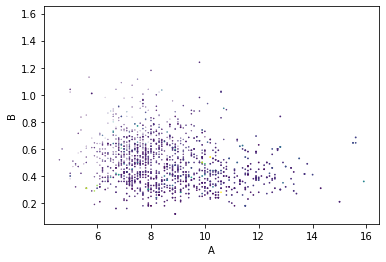

In [ ]:
#Plotearlo, hacerlo gráficamente: 
plt.scatter(x['fixed acidity'], x['volatile acidity'], x['citric acid'], x['residual sugar'])
plt.xlabel('A', fontsize=10) #Crea las 2 etiquetas y le asigna tamaño. 
plt.ylabel('B', fontsize=10)

In [ ]:
#Creamos el modelo:
model= KMeans(n_clusters=2,max_iter=1000) #Define el modelo con el algoritmo KMeans con dos parámetros: 1) n_clusters p/ estar seguros que son dos grupos y 2)Iteración que significa como moveremos K 
model.fit(x)                              #Lo entrena, x son los puntos.
y_labels= model.labels_                   #Mandamos a obtener los labels, son todas las etiquetas que encontró.

In [ ]:
#Hacer la predicción de y, a ver cómo lo dividió:
#Devuelve un arreglo de 0 y 1, son los dos grupos encontrados relacionados al gráfico anterior. 
y_kmeans=model.predict(x)       #y_kmeans es la etiqueta que la obtenemos a través de predict p/ que muestre el arreglo (0-1) Cuando cambié el nclusters se dividio en 3 
print('Predicciones', y_kmeans) #Le decimos que imprima las predicciones y cómo dividió la info. El valor a imprimir es y_kmeans

Predicciones [0 0 0 ... 0 0 0]


In [ ]:
#Para saber si hizo bien la división, si esos grupos son los adecuados:
#Teniendo el nclusters en 2 el porcentaje es de 53, cambiandolo a 3 es de 73
from sklearn import metrics   #Obtenemos un método, importamos metrics que ayuda a generar el accuracy
accuracy=metrics.adjusted_rand_score(Y_wine, y_kmeans) #El método randscore necesita 2 valores: yiris es la info que tenemos de entrada y ykmeans es la predicción
print (accuracy)

0.02270270478903958


Text(0, 0.5, 'B')

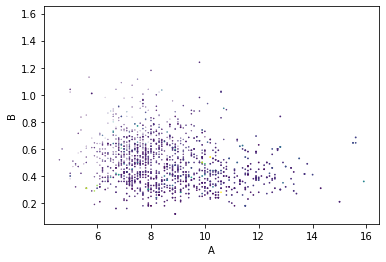

In [ ]:
#Obtener atributos visuales:
plt.scatter(x['fixed acidity'], x['volatile acidity'], x['citric acid'], x['residual sugar'])
plt.xlabel('A', fontsize=10)
plt.ylabel('B', fontsize=10)